In [1]:
#lego dataset prepro
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xmltodict
import json
import xml.etree.ElementTree as ET
import xmltodict
import json
from lxml import etree
from io import StringIO

In [2]:
for dirname, _, filenames in os.walk('../data/lego600/annotations'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        with open(os.path.join(dirname, filename), 'r') as f:
            data = f.read()
            # print(a)
            # print(json.dumps(xmltodict.parse(data), indent=4))
            a =  json.loads(json.dumps(xmltodict.parse(data), indent=4).replace("'", "\""))
            print(a.keys())
        break
        # print(json.dumps(xmltodict.parse(data), indent=4))

../data/lego600/annotations\00002a86-e7ac-11eb-9d54-b0c090bd3910.xml
dict_keys(['annotation'])


In [3]:
a["annotation"]['object']

[{'name': '27263',
  'difficult': '0',
  'bndbox': {'xmin': '122', 'ymin': '124', 'xmax': '299', 'ymax': '296'}},
 {'name': '30374',
  'difficult': '0',
  'bndbox': {'xmin': '0', 'ymin': '12', 'xmax': '143', 'ymax': '232'}}]

In [4]:
lego = {
    "info": {
        "description": "Largest LEGO Dataset (600 parts)",
        "url": "https://www.kaggle.com/dreamfactor/biggest-lego-dataset-600-parts",
        "version": "2.0",
        "year": 2020,
        "contributor": "b200",
        "date_created": " "
    },
    "licenses": [
        {
            "url": "",
            "id": 1,
            "name": ""
        }
    ],
    "images": [],
    "annotations": [],
    "categories": [], # <-- Not in Captions annotations
    "segment_info": [] # <-- Only in Panoptic annotations
}

lego_image={
    "license": 1,
    "file_name": "",
    "coco_url": "",
    "height": 2048,
    "width": 2048,
    "date_captured": "",
    "flickr_url": "",
    "id": 0
}
lego_annotation =  {
    "segmentation": [],
    "area": 0,
    "iscrowd": 0,
    "image_id": 0,
    "bbox": [],
    "category_id": "",
    "id": 0
}

In [44]:
lego_images = []
lego_images_anno = []
threshold = [6000, 7500, 8000]
train_ids = {}
val_ids = {}
test_ids = {}
ids = {}

index = 0
for dirname, _, filenames in os.walk('../data/lego600/annotations'):
    for filename in filenames:
        
        magical_parser = etree.XMLParser(encoding='utf-8', recover=True)
        xmlstr = etree.parse(os.path.join(dirname, filename), magical_parser)
            
        data = dict(xmltodict.parse(etree.tostring(xmlstr)))
            
        # data = json.loads(json.dumps(xmltodict.parse(f_read), indent=4).replace("'", "\""))
        print(data["annotation"]["filename"])
        image_id = int(''.join(filter(str.isdigit, data["annotation"]["filename"])))
            
        lego_images.append({
            "license": 1,
            "file_name": data["annotation"]["filename"],
            "coco_url": "",
            "height":  int(data["annotation"]["size"]["width"]),
            "width": int(data["annotation"]["size"]["height"]),
            "date_captured": "",
            "flickr_url": "",
            "id": image_id
        })
        for elem in data["annotation"]['object']:
            # print(elem)
            xmin = int(elem['bndbox']['xmin'])
            ymin = int(elem['bndbox']['ymin'])
            xmax = int(elem['bndbox']['xmax'])
            ymax = int(elem['bndbox']['ymax'])
            elem_name = ''.join(filter(str.isdigit, elem['name']))
            lego_images_anno.append({
                "segmentation": [],
                "area": 0,
                "iscrowd": 0,
                "image_id": image_id,
                "bbox": [xmin, ymin, xmax - xmin, ymax - ymin],
                "category_id": elem_name,
                "id": int(elem_name + str(image_id))
            })
            if elem_name not in ids.keys():
                ids[elem_name] = 1
            else:
                ids[elem_name] = ids[elem_name] + 1
        if index == threshold[0]:
            lego['annotations'] = lego_images_anno
            lego['images'] = lego_images
            with open('train_lego_600_coco_style.json.json', 'w') as f:
                json.dump(lego, f)
            lego_images = []
            lego_images_anno = []
            train_ids = ids
            ids = {}
                
        if index == threshold[1]:
            lego['annotations'] = lego_images_anno
            lego['images'] = lego_images
            with open('val_lego_600_coco_style.json.json', 'w') as f:
                json.dump(lego, f)
            lego_images = []
            lego_images_anno = []
            val_ids = ids
            ids = {}
            
        if index == threshold[2]:
            with open('test_lego_600_coco_style.json.json', 'w') as f:
                lego['annotations'] = lego_images_anno
                lego['images'] = lego_images
                json.dump(lego, f)
            lego_images = []
            lego_images_anno = []
            test_ids = ids
            ids = {}
            
            break
        index += 1

00002a86-e7ac-11eb-9d54-b0c090bd3910.jpg
00002cc0-e4b9-11eb-afd8-b0c090bd3910.jpg
000120ae-e601-11eb-aaa1-b0c090bd3910.jpg
00013d5a-e7b9-11eb-924a-b0c090bd3910.jpg
00017dcc-e462-11eb-9a00-b0c090bd3910.jpg
0001c398-e668-11eb-b746-b0c090bd3910.jpg
0001f670-da3b-11eb-b236-3497f683a169.jpg
0002651c-e4a0-11eb-bd6b-b0c090bd3910.jpg
0002a3b0-dab1-11eb-aff4-3497f683a169.jpg
0002c168-e663-11eb-bd84-b0c090bd3910.jpg
0002fd4a-da9c-11eb-af4e-3497f683a169.jpg
00030736-e2d6-11eb-954e-b0c090bd3910.jpg
000332d0-e45f-11eb-9421-b0c090bd3910.jpg
000370f6-e2fc-11eb-bb95-b0c090bd3910.jpg
0003a7da-daa0-11eb-9e3d-3497f683a169.jpg
0003ad8a-e488-11eb-859f-b0c090bd3910.jpg
0003fcac-e454-11eb-b82c-b0c090bd3910.jpg
0004e4a2-e5cb-11eb-a1d0-b0c090bd3910.jpg
00050130-dafd-11eb-bfed-3497f683a169.jpg
000535b0-db70-11eb-a10f-3497f683a169.jpg
0005656e-e4ce-11eb-8846-b0c090bd3910.jpg
0005abc2-da43-11eb-a55c-3497f683a169.jpg
0005f4de-e7b3-11eb-8819-b0c090bd3910.jpg
00066030-e469-11eb-84f8-b0c090bd3910.jpg
00066fda-e660-11

006ca89c-e690-11eb-af54-b0c090bd3910.jpg
006ced18-db4f-11eb-a945-3497f683a169.jpg
006ddad8-da19-11eb-ae10-3497f683a169.jpg
006de122-e479-11eb-885b-b0c090bd3910.jpg
006dee8c-e66c-11eb-9665-b0c090bd3910.jpg
006dfb14-dabd-11eb-a44a-3497f683a169.jpg
006e4490-e2ef-11eb-9c7f-b0c090bd3910.jpg
006f2642-e686-11eb-aebb-b0c090bd3910.jpg
006fdb94-e4b6-11eb-b44e-b0c090bd3910.jpg
00704436-e5d4-11eb-b26b-b0c090bd3910.jpg
0070af74-da20-11eb-b02e-3497f683a169.jpg
0070cf68-e79b-11eb-afad-b0c090bd3910.jpg
00715358-e4b3-11eb-bd7e-b0c090bd3910.jpg
00717580-e7b2-11eb-99b1-b0c090bd3910.jpg
0072ac40-da6e-11eb-b931-3497f683a169.jpg
0072c428-e4a1-11eb-b193-b0c090bd3910.jpg
0073f5e4-da36-11eb-8073-3497f683a169.jpg
007425ac-d954-11eb-8983-b0c090bd3910.jpg
0074327a-e4bf-11eb-81e5-b0c090bd3910.jpg
00746318-e7a0-11eb-a236-b0c090bd3910.jpg
0074f1a2-e78d-11eb-a646-b0c090bd3910.jpg
0075058c-db51-11eb-b925-3497f683a169.jpg
00752d00-daf7-11eb-b07a-3497f683a169.jpg
007571e6-e5df-11eb-ac5e-b0c090bd3910.jpg
00762874-e45e-11

00d6feda-da28-11eb-930a-3497f683a169.jpg
00d70a8c-e5e9-11eb-8aab-b0c090bd3910.jpg
00d8e712-e5d6-11eb-bcdc-b0c090bd3910.jpg
00d94d24-e7ad-11eb-a154-b0c090bd3910.jpg
00da1aee-e2d1-11eb-8376-b0c090bd3910.jpg
00dabe68-d9c2-11eb-9bce-3497f683a169.jpg
00db7bb6-da16-11eb-aced-3497f683a169.jpg
00dbe510-e5c9-11eb-9286-b0c090bd3910.jpg
00dc5912-d9c3-11eb-ad38-3497f683a169.jpg
00dc6cfa-e3a0-11eb-b47a-b0c090bd3910.jpg
00dcb1a6-e688-11eb-8b88-b0c090bd3910.jpg
00dce5d2-e3d9-11eb-b9ab-b0c090bd3910.jpg
00de3cc6-e79e-11eb-82bd-b0c090bd3910.jpg
00de3e92-db7f-11eb-903b-3497f683a169.jpg
00e151e4-d94b-11eb-942a-b0c090bd3910.jpg
00e1a3c8-e5c6-11eb-b1ac-b0c090bd3910.jpg
00e222c2-e5f3-11eb-b9aa-b0c090bd3910.jpg
00e22714-da60-11eb-84e3-3497f683a169.jpg
00e28162-d9d9-11eb-828a-3497f683a169.jpg
00e2c342-e486-11eb-8b85-b0c090bd3910.jpg
00e3dcc6-e65d-11eb-b757-b0c090bd3910.jpg
00e493c0-e3db-11eb-bd14-b0c090bd3910.jpg
00e4f622-e5db-11eb-9575-b0c090bd3910.jpg
00e5109c-d93f-11eb-bd77-b0c090bd3910.jpg
00e548d8-e67c-11

014e257e-db31-11eb-87d8-3497f683a169.jpg
014ea24a-da70-11eb-a22c-3497f683a169.jpg
014eba26-d9d6-11eb-a9c8-3497f683a169.jpg
014f0442-e7ca-11eb-8c31-b0c090bd3910.jpg
014f7098-e2e5-11eb-894f-b0c090bd3910.jpg
014f93fe-e603-11eb-b740-b0c090bd3910.jpg
014f9e82-e5cb-11eb-8272-b0c090bd3910.jpg
014fb03e-daa4-11eb-8049-3497f683a169.jpg
014fcf5c-da0d-11eb-9c9d-3497f683a169.jpg
01501668-e45b-11eb-8993-b0c090bd3910.jpg
01507f36-e65e-11eb-8d39-b0c090bd3910.jpg
01515652-e468-11eb-854a-b0c090bd3910.jpg
015171ca-da3d-11eb-8390-3497f683a169.jpg
0153a398-da38-11eb-a9d1-3497f683a169.jpg
0153d43a-e681-11eb-b7ff-b0c090bd3910.jpg
01543f40-da22-11eb-b71e-3497f683a169.jpg
01544106-e66b-11eb-b586-b0c090bd3910.jpg
015446f6-e7ba-11eb-8bb6-b0c090bd3910.jpg
0154c34c-db86-11eb-9dd0-3497f683a169.jpg
0154d094-da75-11eb-a4cf-3497f683a169.jpg
015615d8-e7c4-11eb-b441-b0c090bd3910.jpg
0156acfe-e5cd-11eb-9c1d-b0c090bd3910.jpg
0157121a-db13-11eb-a86c-3497f683a169.jpg
015885dc-e2e7-11eb-b68d-b0c090bd3910.jpg
0158ad64-e796-11

01ceb5ee-e5d9-11eb-888a-b0c090bd3910.jpg
01cf08de-e2d0-11eb-ac7f-b0c090bd3910.jpg
01cf8eca-e5ca-11eb-a6bc-b0c090bd3910.jpg
01cf9330-e794-11eb-a784-b0c090bd3910.jpg
01cf9cca-e3a0-11eb-908d-b0c090bd3910.jpg
01d09ce6-d960-11eb-b0c2-b0c090bd3910.jpg
01d0add0-e7a7-11eb-a8a6-b0c090bd3910.jpg
01d0d33a-e68f-11eb-9f07-b0c090bd3910.jpg
01d0d680-e3a9-11eb-b654-b0c090bd3910.jpg
01d0efb8-daf0-11eb-858e-3497f683a169.jpg
01d0f650-e2fc-11eb-94c3-b0c090bd3910.jpg
01d10218-e78c-11eb-afe7-b0c090bd3910.jpg
01d10eba-e47c-11eb-928f-b0c090bd3910.jpg
01d22266-db12-11eb-beb6-3497f683a169.jpg
01d22aba-e65c-11eb-80a5-b0c090bd3910.jpg
01d26ff6-e791-11eb-8c57-b0c090bd3910.jpg
01d28a3a-da94-11eb-9cfd-3497f683a169.jpg
01d2955c-d93e-11eb-9cac-b0c090bd3910.jpg
01d3c7e6-d9ee-11eb-9364-3497f683a169.jpg
01d481b6-d94b-11eb-9941-b0c090bd3910.jpg
01d4c05e-e463-11eb-8277-b0c090bd3910.jpg
01d4ffae-e5dd-11eb-b1ec-b0c090bd3910.jpg
01d52212-e5cb-11eb-a32e-b0c090bd3910.jpg
01d58fae-e65d-11eb-82d9-b0c090bd3910.jpg
01d60268-e478-11

0251002c-e7ba-11eb-b29b-b0c090bd3910.jpg
02512a74-e7ab-11eb-ae5a-b0c090bd3910.jpg
02517426-da61-11eb-9872-3497f683a169.jpg
02518f0c-e5d3-11eb-b84e-b0c090bd3910.jpg
0251949c-e2f9-11eb-ad01-b0c090bd3910.jpg
025194e6-da17-11eb-a01f-3497f683a169.jpg
0251d99c-dabe-11eb-91f6-3497f683a169.jpg
02520ad2-da0f-11eb-bdc7-3497f683a169.jpg
0253c25e-e65e-11eb-8a5a-b0c090bd3910.jpg
0253d6b8-e65b-11eb-a36e-b0c090bd3910.jpg
025403d8-e49d-11eb-9e8f-b0c090bd3910.jpg
02544198-e46f-11eb-aa21-b0c090bd3910.jpg
025449ca-e4d1-11eb-ba57-b0c090bd3910.jpg
025508d0-e3c5-11eb-9094-b0c090bd3910.jpg
0255caae-da53-11eb-be5e-3497f683a169.jpg
02561942-e5ee-11eb-b25a-b0c090bd3910.jpg
02567b7e-e65d-11eb-8daf-b0c090bd3910.jpg
02568d40-d9eb-11eb-a15c-3497f683a169.jpg
025718e6-e2d5-11eb-a009-b0c090bd3910.jpg
025774d8-e5ca-11eb-913c-b0c090bd3910.jpg
0257b25c-e678-11eb-9bd7-b0c090bd3910.jpg
0258e450-e671-11eb-bbc9-b0c090bd3910.jpg
0259146e-d95e-11eb-99de-b0c090bd3910.jpg
025a9882-e66d-11eb-b3db-b0c090bd3910.jpg
025aa6b0-e465-11

02d00b62-e3b3-11eb-aece-b0c090bd3910.jpg
02d0de00-e3c7-11eb-871e-b0c090bd3910.jpg
02d12ba8-e7c4-11eb-a1bb-b0c090bd3910.jpg
02d16488-da09-11eb-b358-3497f683a169.jpg
02d1867a-e7d3-11eb-8e9e-b0c090bd3910.jpg
02d18b4c-d9ec-11eb-bc10-3497f683a169.jpg
02d1b6e4-dac1-11eb-b030-3497f683a169.jpg
02d1baf8-d954-11eb-8afd-b0c090bd3910.jpg
02d1cdb6-d94a-11eb-b908-b0c090bd3910.jpg
02d20b1c-e67a-11eb-95a1-b0c090bd3910.jpg
02d20c8a-d9e7-11eb-bd64-3497f683a169.jpg
02d26274-db68-11eb-afce-3497f683a169.jpg
02d2bad2-da00-11eb-bc28-3497f683a169.jpg
02d2f68a-e5c9-11eb-8312-b0c090bd3910.jpg
02d32a90-e5d5-11eb-9e09-b0c090bd3910.jpg
02d35b42-da5d-11eb-b7cf-3497f683a169.jpg
02d39190-e5c4-11eb-a20c-b0c090bd3910.jpg
02d3a868-d9da-11eb-a484-3497f683a169.jpg
02d3f7d4-d944-11eb-ba41-b0c090bd3910.jpg
02d4027e-dad6-11eb-8ce6-3497f683a169.jpg
02d41cf6-e667-11eb-83ee-b0c090bd3910.jpg
02d46146-e672-11eb-b16a-b0c090bd3910.jpg
02d4816e-e65e-11eb-89ed-b0c090bd3910.jpg
02d4b086-db40-11eb-b9e1-3497f683a169.jpg
02d4baf8-db0f-11

0346749c-e2e0-11eb-9cb4-b0c090bd3910.jpg
0346cfb6-db2a-11eb-89f0-3497f683a169.jpg
0346d0d4-da01-11eb-9bf1-3497f683a169.jpg
034772b4-e65c-11eb-91de-b0c090bd3910.jpg
0347c64c-d9e0-11eb-b6f3-3497f683a169.jpg
0347f51a-e2f0-11eb-a7e5-b0c090bd3910.jpg
034817d8-db5d-11eb-83e3-3497f683a169.jpg
0348d526-e46b-11eb-acc8-b0c090bd3910.jpg
0349d328-e301-11eb-a8e2-b0c090bd3910.jpg
034ae5fe-da81-11eb-894f-3497f683a169.jpg
034b4086-e3cb-11eb-93fe-b0c090bd3910.jpg
034b4ac0-e2e3-11eb-bfff-b0c090bd3910.jpg
034bd054-e799-11eb-bb48-b0c090bd3910.jpg
034c24e8-e7be-11eb-a5fc-b0c090bd3910.jpg
034c9d36-da27-11eb-8c8f-3497f683a169.jpg
034d2ee8-e4a6-11eb-a920-b0c090bd3910.jpg
034d4962-da2a-11eb-9fdb-3497f683a169.jpg
034da04a-e45e-11eb-b531-b0c090bd3910.jpg
034de368-d9e1-11eb-b445-3497f683a169.jpg
034e20ac-d9cd-11eb-aac1-3497f683a169.jpg
034f2bfe-e7cd-11eb-9d70-b0c090bd3910.jpg
034f6cd2-e461-11eb-bd53-b0c090bd3910.jpg
034fc508-da32-11eb-b6f1-3497f683a169.jpg
034fdfde-e2f3-11eb-9a5c-b0c090bd3910.jpg
03500afa-d9c0-11

03c7d052-e3c9-11eb-b2a6-b0c090bd3910.jpg
03c7de7a-dac0-11eb-bafa-3497f683a169.jpg
03c80f36-da7d-11eb-8ef2-3497f683a169.jpg
03c85478-e456-11eb-9007-b0c090bd3910.jpg
03c8c5e4-e665-11eb-a95e-b0c090bd3910.jpg
03c8ff8a-da21-11eb-ab60-3497f683a169.jpg
03c94150-e65b-11eb-a9ee-b0c090bd3910.jpg
03c944e4-e3d0-11eb-94cd-b0c090bd3910.jpg
03c9563a-e5d4-11eb-a96b-b0c090bd3910.jpg
03c9a266-e7d1-11eb-b4a0-b0c090bd3910.jpg
03cae492-da1a-11eb-b987-3497f683a169.jpg
03cb72f8-e3a0-11eb-abc3-b0c090bd3910.jpg
03cc5718-e2d9-11eb-93bb-b0c090bd3910.jpg
03cd06e4-d9c5-11eb-9191-3497f683a169.jpg
03cd5ffe-d961-11eb-ae6d-b0c090bd3910.jpg
03cd9248-db36-11eb-aed4-3497f683a169.jpg
03cdda3a-da11-11eb-89d9-3497f683a169.jpg
03ce7738-e5f9-11eb-93a3-b0c090bd3910.jpg
03ceeb06-e7d0-11eb-b8ac-b0c090bd3910.jpg
03cf1052-e6a2-11eb-adfe-b0c090bd3910.jpg
03cf49a2-e3c0-11eb-a008-b0c090bd3910.jpg
03d21b00-d956-11eb-b0c9-b0c090bd3910.jpg
03d27fba-e5d9-11eb-8894-b0c090bd3910.jpg
03d2a834-e65e-11eb-8bb8-b0c090bd3910.jpg
03d38312-db81-11

0451b092-da9d-11eb-ba91-3497f683a169.jpg
0451b5e4-e604-11eb-8741-b0c090bd3910.jpg
045259f8-e484-11eb-ab30-b0c090bd3910.jpg
0452c7d4-db30-11eb-9293-3497f683a169.jpg
04532662-e699-11eb-bb07-b0c090bd3910.jpg
0453637e-e3cf-11eb-bb56-b0c090bd3910.jpg
0454a258-e5ed-11eb-97ee-b0c090bd3910.jpg
0454c54a-e5dd-11eb-84bc-b0c090bd3910.jpg
04554926-e3da-11eb-81ac-b0c090bd3910.jpg
045564e2-e2ce-11eb-97e4-b0c090bd3910.jpg
0455a4c0-e667-11eb-a40b-b0c090bd3910.jpg
0456e206-e7a9-11eb-ac3c-b0c090bd3910.jpg
0457e6fa-dad5-11eb-b6d5-3497f683a169.jpg
045823a4-e600-11eb-a733-b0c090bd3910.jpg
0458c8f4-d945-11eb-9550-b0c090bd3910.jpg
04590cae-da0d-11eb-adbe-3497f683a169.jpg
04593a02-e68f-11eb-b393-b0c090bd3910.jpg
045a8dd0-e7c3-11eb-8824-b0c090bd3910.jpg
045a8f18-e2f1-11eb-888c-b0c090bd3910.jpg
045b0914-d94c-11eb-ba0b-b0c090bd3910.jpg
045b2f06-da53-11eb-8d46-3497f683a169.jpg
045b865c-e47f-11eb-a7c6-b0c090bd3910.jpg
045bb2c8-e5f4-11eb-b5d3-b0c090bd3910.jpg
045ceeae-e48b-11eb-a4b0-b0c090bd3910.jpg
045d16f4-e5ce-11

04d31cfe-da38-11eb-9ef3-3497f683a169.jpg
04d414d8-e7d2-11eb-aa53-b0c090bd3910.jpg
04d439c6-da5e-11eb-b280-3497f683a169.jpg
04d446ac-e7a8-11eb-b858-b0c090bd3910.jpg
04d56c94-e2dd-11eb-a3a4-b0c090bd3910.jpg
04d5749c-e5c6-11eb-bdaa-b0c090bd3910.jpg
04d57cfe-e78f-11eb-af2f-b0c090bd3910.jpg
04d5d04c-e78c-11eb-852b-b0c090bd3910.jpg
04d5ed34-e6a4-11eb-830c-b0c090bd3910.jpg
04d64306-da39-11eb-9a6a-3497f683a169.jpg
04d64488-d94d-11eb-beef-b0c090bd3910.jpg
04d64686-db19-11eb-b4d5-3497f683a169.jpg
04d68958-e66d-11eb-89e9-b0c090bd3910.jpg
04d6af40-e2cf-11eb-b04a-b0c090bd3910.jpg
04d731be-e7bf-11eb-8833-b0c090bd3910.jpg
04d7467e-e5fc-11eb-8224-b0c090bd3910.jpg
04d7d654-e5be-11eb-8aa3-b0c090bd3910.jpg
04d858da-e3bd-11eb-b17a-b0c090bd3910.jpg
04d87546-e7cf-11eb-94b9-b0c090bd3910.jpg
04d91dc8-db13-11eb-82d9-3497f683a169.jpg
04d97d94-e48f-11eb-80a8-b0c090bd3910.jpg
04da0d22-e3ba-11eb-81c5-b0c090bd3910.jpg
04da59b4-e67d-11eb-ad8a-b0c090bd3910.jpg
04daded8-d94e-11eb-9405-b0c090bd3910.jpg
04db3de4-e3a0-11

053817b6-da4a-11eb-bcd1-3497f683a169.jpg
0538515a-db44-11eb-b217-3497f683a169.jpg
05392e1a-e4a8-11eb-90b9-b0c090bd3910.jpg
05397448-daf9-11eb-a493-3497f683a169.jpg
05399992-d962-11eb-a58e-b0c090bd3910.jpg
05399e74-dad7-11eb-aa91-3497f683a169.jpg
0539aae8-e5bf-11eb-b1d2-b0c090bd3910.jpg
0539fc68-e458-11eb-8a31-b0c090bd3910.jpg
053a1cae-e3c1-11eb-8a49-b0c090bd3910.jpg
053a7326-e65b-11eb-8e81-b0c090bd3910.jpg
053ada1a-daf5-11eb-93e1-3497f683a169.jpg
053afb64-e5c2-11eb-9870-b0c090bd3910.jpg
053de8a6-db0c-11eb-9e91-3497f683a169.jpg
053e355c-e3c4-11eb-897f-b0c090bd3910.jpg
053e86dc-d96b-11eb-b3c9-b0c090bd3910.jpg
053ed0ca-dafb-11eb-a4e2-3497f683a169.jpg
053f27be-da8e-11eb-b632-3497f683a169.jpg
053f40ae-e4a4-11eb-909a-b0c090bd3910.jpg
053fc5e2-daff-11eb-a6b2-3497f683a169.jpg
053fd606-db14-11eb-8c45-3497f683a169.jpg
0540d930-da13-11eb-8575-3497f683a169.jpg
05417b62-da1a-11eb-ac92-3497f683a169.jpg
0541e58c-e672-11eb-8396-b0c090bd3910.jpg
05423764-e68e-11eb-bd86-b0c090bd3910.jpg
0542a4fa-db1e-11

060c872e-e5de-11eb-a841-b0c090bd3910.jpg
060d2376-d9ed-11eb-9321-3497f683a169.jpg
060dc698-e479-11eb-9ebb-b0c090bd3910.jpg
060eda14-db5d-11eb-b925-3497f683a169.jpg
060ef540-db29-11eb-b5e4-3497f683a169.jpg
060f961e-e4c2-11eb-b056-b0c090bd3910.jpg
061011d4-e7ca-11eb-9be5-b0c090bd3910.jpg
06101652-d9d6-11eb-9f77-3497f683a169.jpg
061081b4-e5cf-11eb-823e-b0c090bd3910.jpg
061151ac-e670-11eb-9648-b0c090bd3910.jpg
06116b90-e67b-11eb-a117-b0c090bd3910.jpg
061195d2-e473-11eb-8872-b0c090bd3910.jpg
0611e078-daca-11eb-8799-3497f683a169.jpg
0611e94a-e3b1-11eb-a058-b0c090bd3910.jpg
06126978-e45b-11eb-9b10-b0c090bd3910.jpg
06128cc0-e5e1-11eb-b9ae-b0c090bd3910.jpg
0613b3cc-e65c-11eb-9b3d-b0c090bd3910.jpg
0613f986-db3a-11eb-af77-3497f683a169.jpg
0614479a-da68-11eb-942c-3497f683a169.jpg
06154ec8-e2ea-11eb-a967-b0c090bd3910.jpg
0616042e-e47d-11eb-8446-b0c090bd3910.jpg
06160a4c-db4d-11eb-a204-3497f683a169.jpg
061649ba-da02-11eb-92f0-3497f683a169.jpg
06166b18-daa5-11eb-ac67-3497f683a169.jpg
061682d0-e4c4-11

0698ace4-e79a-11eb-9414-b0c090bd3910.jpg
0699a9ae-d9bc-11eb-b4c0-3497f683a169.jpg
0699ffda-db81-11eb-b2e5-3497f683a169.jpg
069a187a-daad-11eb-b818-3497f683a169.jpg
069a4188-dab8-11eb-a107-3497f683a169.jpg
069ac5dc-da0f-11eb-8b54-3497f683a169.jpg
069adba8-da5d-11eb-99a5-3497f683a169.jpg
069bfe52-db48-11eb-80df-3497f683a169.jpg
069c15c0-da41-11eb-8405-3497f683a169.jpg
069ca17a-dac9-11eb-9937-3497f683a169.jpg
069d365a-dad5-11eb-83b6-3497f683a169.jpg
069d5426-d93d-11eb-90c2-b0c090bd3910.jpg
069e57c6-da5e-11eb-916f-3497f683a169.jpg
069e964a-e3a5-11eb-a785-b0c090bd3910.jpg
069ea164-db3f-11eb-9e80-3497f683a169.jpg
069ee868-db1d-11eb-b2ba-3497f683a169.jpg
069f42b6-e68d-11eb-b231-b0c090bd3910.jpg
069f79c2-e478-11eb-b47f-b0c090bd3910.jpg
069fcf34-da94-11eb-a98a-3497f683a169.jpg
069ff718-e492-11eb-bf97-b0c090bd3910.jpg
06a041b4-db07-11eb-8a02-3497f683a169.jpg
06a04f48-e5e5-11eb-94d9-b0c090bd3910.jpg
06a0d30c-daf8-11eb-ba2e-3497f683a169.jpg
06a15f82-e5f5-11eb-a54a-b0c090bd3910.jpg
06a177ec-d954-11

07360006-e67b-11eb-853b-b0c090bd3910.jpg
07367db4-daf6-11eb-9148-3497f683a169.jpg
0736de02-d965-11eb-a0eb-b0c090bd3910.jpg
0737ac90-e3ab-11eb-9ef7-b0c090bd3910.jpg
0737bd10-d9c4-11eb-8867-3497f683a169.jpg
073982b6-e793-11eb-a485-b0c090bd3910.jpg
0739c3b4-e49c-11eb-b5a0-b0c090bd3910.jpg
0739f338-e69d-11eb-bb3e-b0c090bd3910.jpg
073a2d70-e65b-11eb-b60f-b0c090bd3910.jpg
073b6a64-e2cf-11eb-8b00-b0c090bd3910.jpg
073bdb64-d947-11eb-baf7-b0c090bd3910.jpg
073be95e-e690-11eb-bfc5-b0c090bd3910.jpg
073c2bac-da89-11eb-b9a3-3497f683a169.jpg
073c63c6-e49d-11eb-9222-b0c090bd3910.jpg
073c731e-da09-11eb-b914-3497f683a169.jpg
073ce11c-da35-11eb-b803-3497f683a169.jpg
073cfa02-daab-11eb-8d2b-3497f683a169.jpg
073d108a-e4a5-11eb-88c0-b0c090bd3910.jpg
073e4d66-dab0-11eb-8172-3497f683a169.jpg
073e5a86-e4dd-11eb-9805-b0c090bd3910.jpg
073ea9ba-e2d4-11eb-8e80-b0c090bd3910.jpg
073f9d7a-da1b-11eb-b585-3497f683a169.jpg
073fa492-db7c-11eb-891b-3497f683a169.jpg
0740038a-da85-11eb-a43d-3497f683a169.jpg
0740123a-da2c-11

07c228b4-e79d-11eb-81ef-b0c090bd3910.jpg
07c2a04a-e670-11eb-88f9-b0c090bd3910.jpg
07c2cde8-e3be-11eb-8695-b0c090bd3910.jpg
07c380f6-e7b5-11eb-acb0-b0c090bd3910.jpg
07c3ae62-e7d1-11eb-9bc8-b0c090bd3910.jpg
07c3d83a-e7bb-11eb-b32e-b0c090bd3910.jpg
07c45742-e2e8-11eb-a45f-b0c090bd3910.jpg
07c4c9fe-e65d-11eb-ad6e-b0c090bd3910.jpg
07c4d062-e5fd-11eb-aa4d-b0c090bd3910.jpg
07c4e5a4-e5dd-11eb-9910-b0c090bd3910.jpg
07c618b4-e3ba-11eb-885a-b0c090bd3910.jpg
07c62e3e-e793-11eb-8392-b0c090bd3910.jpg
07c661b4-da1f-11eb-8f7e-3497f683a169.jpg
07c6dd6c-db0f-11eb-a9b6-3497f683a169.jpg
07c72070-e7a3-11eb-beec-b0c090bd3910.jpg
07c72cee-da0f-11eb-84fb-3497f683a169.jpg
07c79554-da9d-11eb-88d2-3497f683a169.jpg
07c7bb52-e3d7-11eb-8404-b0c090bd3910.jpg
07c85762-e454-11eb-9689-b0c090bd3910.jpg
07c91b78-d954-11eb-847f-b0c090bd3910.jpg
07c9424c-da52-11eb-9d8a-3497f683a169.jpg
07c9da06-db2c-11eb-b938-3497f683a169.jpg
07c9ed06-e666-11eb-bdb3-b0c090bd3910.jpg
07c9f8a6-e7a6-11eb-b166-b0c090bd3910.jpg
07ca0c2c-db02-11

085a0aba-e469-11eb-b9a7-b0c090bd3910.jpg
085a4b5e-d9cb-11eb-9902-3497f683a169.jpg
085a8680-daaf-11eb-b5a0-3497f683a169.jpg
085a9de4-d957-11eb-9c12-b0c090bd3910.jpg
085ba70c-daf7-11eb-9b79-3497f683a169.jpg
085c03a2-db66-11eb-bae0-3497f683a169.jpg
085c272c-da3b-11eb-a0d6-3497f683a169.jpg
085c66e8-e5cf-11eb-8d83-b0c090bd3910.jpg
085c8162-da8a-11eb-afdd-3497f683a169.jpg
085cd3ee-e680-11eb-a493-b0c090bd3910.jpg
085d0ea2-e7ac-11eb-a61a-b0c090bd3910.jpg
085de7cc-e79a-11eb-b97a-b0c090bd3910.jpg
085ef7cc-db37-11eb-9be7-3497f683a169.jpg
085f11c0-e5d0-11eb-b089-b0c090bd3910.jpg
086017c6-d94e-11eb-b3de-b0c090bd3910.jpg
08601ab0-e2ff-11eb-814b-b0c090bd3910.jpg
0860e692-da9b-11eb-a8fe-3497f683a169.jpg
086105d8-e476-11eb-8dcf-b0c090bd3910.jpg
08611662-e7d3-11eb-b6f2-b0c090bd3910.jpg
0861df70-db06-11eb-a0a2-3497f683a169.jpg
0862085c-db67-11eb-8f4c-3497f683a169.jpg
08621d80-e797-11eb-9b2e-b0c090bd3910.jpg
0862556e-e5c4-11eb-8ea1-b0c090bd3910.jpg
08626e54-da5d-11eb-864a-3497f683a169.jpg
0862c664-da84-11

08f96d3a-e7cc-11eb-b7af-b0c090bd3910.jpg
08f998c8-d9ca-11eb-80f1-3497f683a169.jpg
08fa36a8-e2eb-11eb-aecc-b0c090bd3910.jpg
08fa69a6-db4a-11eb-87e1-3497f683a169.jpg
08fa7d86-e5fd-11eb-ad6e-b0c090bd3910.jpg
08fa8514-e2f2-11eb-ba25-b0c090bd3910.jpg
08fab5ee-e306-11eb-abac-b0c090bd3910.jpg
08fad2fa-e3a8-11eb-b5de-b0c090bd3910.jpg
08fb58e8-dabc-11eb-8b11-3497f683a169.jpg
08fba50a-db27-11eb-938f-3497f683a169.jpg
08fbbf92-e3a6-11eb-8d63-b0c090bd3910.jpg
08fbd0d2-e795-11eb-a839-b0c090bd3910.jpg
08fc9724-da24-11eb-99ab-3497f683a169.jpg
08fc9b64-da1c-11eb-965f-3497f683a169.jpg
08fcb5c2-e671-11eb-b733-b0c090bd3910.jpg
08fd60ee-e3da-11eb-984d-b0c090bd3910.jpg
08fd6236-e669-11eb-a84c-b0c090bd3910.jpg
08fda0fa-e5df-11eb-b4bd-b0c090bd3910.jpg
08fe0e3a-da87-11eb-afa7-3497f683a169.jpg
08fe30c8-e3b3-11eb-89f0-b0c090bd3910.jpg
08fe82ae-d959-11eb-969e-b0c090bd3910.jpg
08fe8ecc-e7d4-11eb-97b8-b0c090bd3910.jpg
08fef4a6-e464-11eb-8cd5-b0c090bd3910.jpg
08ff23ac-e6a2-11eb-8458-b0c090bd3910.jpg
08ff534a-e3ad-11

09a33da4-da03-11eb-9272-3497f683a169.jpg
09a43790-d952-11eb-80b3-b0c090bd3910.jpg
09a505f6-e7b1-11eb-beb1-b0c090bd3910.jpg
09a6203a-e5ca-11eb-a085-b0c090bd3910.jpg
09a6592c-da4e-11eb-9ba4-3497f683a169.jpg
09a67ee8-e4c1-11eb-b385-b0c090bd3910.jpg
09a683a8-da8d-11eb-a7ae-3497f683a169.jpg
09a74394-e5cd-11eb-b633-b0c090bd3910.jpg
09a76578-e2e2-11eb-86e8-b0c090bd3910.jpg
09a7764c-e5e1-11eb-8da5-b0c090bd3910.jpg
09a78154-da12-11eb-a2d2-3497f683a169.jpg
09a793ae-e5c1-11eb-af3e-b0c090bd3910.jpg
09a7f20a-db50-11eb-87cc-3497f683a169.jpg
09a88240-db2f-11eb-99e8-3497f683a169.jpg
09a89600-da19-11eb-88c8-3497f683a169.jpg
09a98fe8-d94a-11eb-b2c5-b0c090bd3910.jpg
09aa249a-d9bd-11eb-b3c8-3497f683a169.jpg
09aa6b78-da0d-11eb-8f49-3497f683a169.jpg
09aa7518-da60-11eb-a1c5-3497f683a169.jpg
09aabb40-e5be-11eb-891c-b0c090bd3910.jpg
09aaec3a-e47f-11eb-8466-b0c090bd3910.jpg
09abbc4c-e673-11eb-959a-b0c090bd3910.jpg
09ac3a5a-e5c2-11eb-b58d-b0c090bd3910.jpg
09ac9c46-d962-11eb-b83a-b0c090bd3910.jpg
09aced5e-dab0-11

0a2350d8-da73-11eb-9a1c-3497f683a169.jpg
0a23c9a6-e48b-11eb-ae09-b0c090bd3910.jpg
0a24379e-e7ba-11eb-8061-b0c090bd3910.jpg
0a244700-e5f4-11eb-a332-b0c090bd3910.jpg
0a24d108-da18-11eb-b6f0-3497f683a169.jpg
0a25302e-e7b8-11eb-b7e1-b0c090bd3910.jpg
0a2590ee-e47c-11eb-bca6-b0c090bd3910.jpg
0a25ee1a-db0c-11eb-84bd-3497f683a169.jpg
0a260758-da5d-11eb-aa2b-3497f683a169.jpg
0a2630dc-db07-11eb-9f9c-3497f683a169.jpg
0a2660ac-db1a-11eb-8502-3497f683a169.jpg
0a27093a-e4eb-11eb-af3f-b0c090bd3910.jpg
0a271350-e78c-11eb-bf0b-b0c090bd3910.jpg
0a274282-e667-11eb-a318-b0c090bd3910.jpg
0a289310-e5dd-11eb-9d8b-b0c090bd3910.jpg
0a294cbe-e5f0-11eb-8bcc-b0c090bd3910.jpg
0a29ca52-d9d5-11eb-a540-3497f683a169.jpg
0a2a2d80-e65b-11eb-a688-b0c090bd3910.jpg
0a2ab39e-d944-11eb-882f-b0c090bd3910.jpg
0a2abbac-e798-11eb-8acb-b0c090bd3910.jpg
0a2add08-da95-11eb-bd40-3497f683a169.jpg
0a2ae2e8-db12-11eb-90a4-3497f683a169.jpg
0a2afbd8-e309-11eb-92e4-b0c090bd3910.jpg
0a2d13c0-db11-11eb-802a-3497f683a169.jpg
0a2d1898-db5f-11

0aab2742-e2e9-11eb-a0ba-b0c090bd3910.jpg
0aab8f66-e3b4-11eb-bb20-b0c090bd3910.jpg
0aabc158-da1d-11eb-a6c3-3497f683a169.jpg
0aac9dae-daba-11eb-bc0d-3497f683a169.jpg
0aacc654-dad8-11eb-b237-3497f683a169.jpg
0aadaa14-d9e8-11eb-bd61-3497f683a169.jpg
0aadb1be-da02-11eb-945f-3497f683a169.jpg
0aadf4de-e671-11eb-876e-b0c090bd3910.jpg
0aadf8c0-da79-11eb-8790-3497f683a169.jpg
0aae02e4-e65f-11eb-a4e2-b0c090bd3910.jpg
0aaec42c-dab2-11eb-982c-3497f683a169.jpg
0aaf57a2-d9d6-11eb-b318-3497f683a169.jpg
0aafa264-db43-11eb-9a61-3497f683a169.jpg
0aafb434-e461-11eb-85a0-b0c090bd3910.jpg
0ab07658-d9be-11eb-bf43-3497f683a169.jpg
0ab078e2-e4a4-11eb-9680-b0c090bd3910.jpg
0ab07b2e-d9d3-11eb-92d8-3497f683a169.jpg
0ab07b36-da3f-11eb-8dd2-3497f683a169.jpg
0ab15346-db05-11eb-8fb1-3497f683a169.jpg
0ab17d86-e475-11eb-ab68-b0c090bd3910.jpg
0ab194c2-d954-11eb-8ee9-b0c090bd3910.jpg
0ab1ebae-e47e-11eb-b586-b0c090bd3910.jpg
0ab24ab4-e7d0-11eb-aa01-b0c090bd3910.jpg
0ab281d0-d947-11eb-97ed-b0c090bd3910.jpg
0ab2afdc-db3f-11

0b31aea4-da2e-11eb-980d-3497f683a169.jpg
0b31b0d4-e5f4-11eb-83f0-b0c090bd3910.jpg
0b328dd2-e67f-11eb-aa81-b0c090bd3910.jpg
0b329ff4-e4cf-11eb-98b4-b0c090bd3910.jpg
0b33446e-e7b5-11eb-b28e-b0c090bd3910.jpg
0b33c20a-dafc-11eb-8e2d-3497f683a169.jpg
0b33e9ae-d9d1-11eb-bb0c-3497f683a169.jpg
0b345b64-da19-11eb-924f-3497f683a169.jpg
0b35257a-da13-11eb-bc96-3497f683a169.jpg
0b363af4-e79c-11eb-9ec2-b0c090bd3910.jpg
0b365d40-daf5-11eb-aadf-3497f683a169.jpg
0b37203e-e4d1-11eb-a79b-b0c090bd3910.jpg
0b37df74-e3cd-11eb-a614-b0c090bd3910.jpg
0b37f3e2-e48c-11eb-b746-b0c090bd3910.jpg
0b38f3fa-daf8-11eb-a67d-3497f683a169.jpg
0b3976be-e697-11eb-a8b2-b0c090bd3910.jpg
0b399750-db32-11eb-9cc8-3497f683a169.jpg
0b3a10b8-e45c-11eb-8a7a-b0c090bd3910.jpg
0b3a7764-db52-11eb-be87-3497f683a169.jpg
0b3b0354-db2e-11eb-bb3a-3497f683a169.jpg
0b3c1d74-e2f6-11eb-a1a1-b0c090bd3910.jpg
0b3c7b18-e7c4-11eb-a1a3-b0c090bd3910.jpg
0b3e20b8-da32-11eb-a613-3497f683a169.jpg
0b3e681c-e5d1-11eb-9561-b0c090bd3910.jpg
0b3ee554-e5d9-11

0c0c746c-e4aa-11eb-8e46-b0c090bd3910.jpg
0c0c74dc-d9d0-11eb-b96f-3497f683a169.jpg
0c0c81a8-e5c4-11eb-b8a9-b0c090bd3910.jpg
0c0ca566-e3a9-11eb-8510-b0c090bd3910.jpg
0c0cdd58-e7b9-11eb-ad79-b0c090bd3910.jpg
0c0d69d4-e7a9-11eb-8831-b0c090bd3910.jpg
0c0d8486-da67-11eb-930a-3497f683a169.jpg
0c0dd782-e2d8-11eb-a6e8-b0c090bd3910.jpg
0c0e47f0-e4a3-11eb-961f-b0c090bd3910.jpg
0c0e6118-e7d0-11eb-876e-b0c090bd3910.jpg
0c0eb452-e5c1-11eb-90fc-b0c090bd3910.jpg
0c0ec9f8-e5e8-11eb-9389-b0c090bd3910.jpg
0c0ee268-e7bb-11eb-a8e5-b0c090bd3910.jpg
0c0f190a-d955-11eb-92e0-b0c090bd3910.jpg
0c0f3170-e45e-11eb-998c-b0c090bd3910.jpg
0c0f327a-db53-11eb-9b2f-3497f683a169.jpg
0c0f4574-e2d0-11eb-aabb-b0c090bd3910.jpg
0c0f55ec-e680-11eb-85ad-b0c090bd3910.jpg
0c0f58f0-e2e1-11eb-a111-b0c090bd3910.jpg
0c0fb5de-e66d-11eb-880d-b0c090bd3910.jpg
0c0fb8cc-e4c1-11eb-be78-b0c090bd3910.jpg
0c1040f0-e68a-11eb-b313-b0c090bd3910.jpg
0c1057f0-db00-11eb-a0ab-3497f683a169.jpg
0c1082d0-dabc-11eb-a205-3497f683a169.jpg
0c10bbd0-db0c-11

In [45]:
len(train_ids)

574

In [46]:
len(val_ids)

574

In [47]:

len(test_ids)

547

819445611800903910 0b81e9b4-e456-11eb-8ece-b0c090bd3910.jpg
8256455112000903910 0b82564c-e5c5-11eb-b2c0-b0c090bd3910.jpg
8308823118883497683169 0b830d88-da23-11eb-888c-3497f683a169.jpg
8332458119800903910 0b83c32e-e458-11eb-be98-b0c090bd3910.jpg


<Figure size 432x288 with 0 Axes>

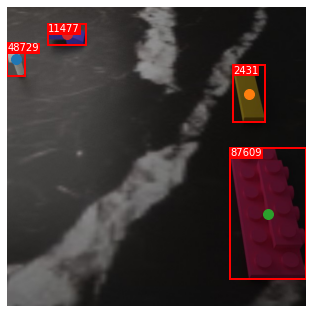

<Figure size 432x288 with 0 Axes>

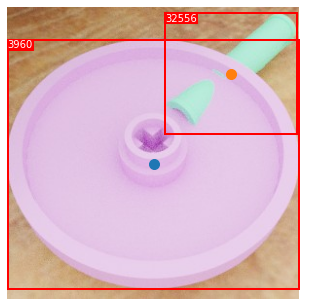

<Figure size 432x288 with 0 Axes>

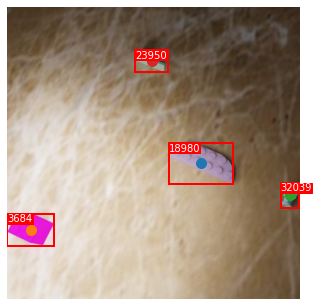

<Figure size 432x288 with 0 Axes>

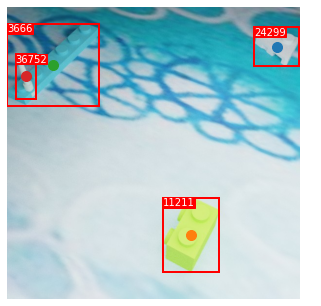

In [49]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.patches as patches
from PIL import Image
# Create plot

threshold = 0
with open('test_lego_600_coco_style.json.json','r') as f:
    data = json.load(f)
    
    for item in data['images']:
        print(item['id'], item['file_name'])
        img = np.array(Image.open("C:/Users/PhD/Downloads/PyTorch-YOLOv3/data/lego600/images/" + item['file_name']))
        plt.figure()

        fig, ax = plt.subplots(1)
        fig.set_size_inches(5.5, 5.5)
        ax.imshow(img)

        for elem in data['annotations']:

            if elem['image_id'] == item['id']:

                x1 = elem['bbox'][0] +  elem['bbox'][2] / 2
                y1 = elem['bbox'][1] + elem['bbox'][3] / 2
                box_w = elem['bbox'][2]
                box_h = elem['bbox'][3]
                # ax[0].plot(x1, y1, 'go', label='marker only')  
                plt.scatter(x1, y1, s=100)
                # bbox = patches.Rectangle((x1, y1), box_w, box_h, linewidth=2, edgecolor="red", facecolor="none")
                # Add the bbox to the plot
                # ax.add_patch(bbox)
                x1 = elem['bbox'][0] 
                y1 = elem['bbox'][1] 
                box_w = elem['bbox'][2]
                box_h = elem['bbox'][3]

                bbox = patches.Rectangle((x1, y1), box_w, box_h, linewidth=2, edgecolor="red", facecolor="none")
                # Add the bbox to the plot
                ax.add_patch(bbox)
                # Add label
                plt.text(
                    x1,
                    y1,
                    s=elem['category_id'],
                    color="white",
                    verticalalignment="top",
                bbox={"color": "red", "pad": 0})

            # Save generated image with detections
        plt.axis("off")
        if threshold == 3:
            break
        threshold += 1


In [50]:
#box form[x,y,w,h]
def convert(size,box):
    dw = 1./size[0]
    dh = 1./size[1]
    x1_center = box[0] +  box[2] / 2
    y1_center = box[1] +  box[3] / 2
    x = x1_center*dw
    y =y1_center*dh
    w = box[2]*dw
    h = box[3]*dh
    return (x,y,w,h)


In [52]:
with open('train_lego_600_coco_style.json.json','r') as f:
    data = json.load(f)
    for item in data['images']:
        image_id = item['id']
        file_name = item['file_name']
        width = item['width']
        height = item['height']
        value = list(filter(lambda item1: item1['image_id'] == image_id, data['annotations']))
        outfile = open('C:\\Users\\PhD\\Downloads\\PyTorch-YOLOv3\\data\\lego600\\%s.txt'%(file_name[:-4]), 'a+')
        for item2 in value:
            category_id = item2['category_id']
            class_id = category_id
            box = item2['bbox']
            bb = convert((width,height),box)
            outfile.write(str(class_id)+" "+" ".join([str(a) for a in bb]) + '\n')
        outfile.close()
        print(image_id)


with open('val_lego_600_coco_style.json.json','r') as f:
    data = json.load(f)
    for item in data['images']:
        image_id = item['id']
        file_name = item['file_name']
        width = item['width']
        height = item['height']
        value = list(filter(lambda item1: item1['image_id'] == image_id, data['annotations']))
        outfile = open('C:\\Users\\PhD\\Downloads\\PyTorch-YOLOv3\\data\\lego600\\%s.txt'%(file_name[:-4]), 'a+')
        for item2 in value:
            category_id = item2['category_id']
            class_id = category_id
            box = item2['bbox']
            bb = convert((width,height),box)
            outfile.write(str(class_id)+" "+" ".join([str(a) for a in bb]) + '\n')
        outfile.close()
        print(image_id)

with open('test_lego_600_coco_style.json.json','r') as f:
    data = json.load(f)
    for item in data['images']:
        image_id = item['id']
        file_name = item['file_name']
        width = item['width']
        height = item['height']
        value = list(filter(lambda item1: item1['image_id'] == image_id, data['annotations']))
        outfile = open('C:\\Users\\PhD\\Downloads\\PyTorch-YOLOv3\\data\\lego600\\%s.txt'%(file_name[:-4]), 'a+')
        for item2 in value:
            category_id = item2['category_id']
            class_id = category_id
            box = item2['bbox']
            bb = convert((width,height),box)
            outfile.write(str(class_id)+" "+" ".join([str(a) for a in bb]) + '\n')
        outfile.close()
        print(image_id)

28671195400903910
204911800903910
12060111100903910
135791192400903910
174621190000903910
13986681174600903910
16703112363497683169
26514011600903910
23011143497683169
2168663118400903910
2491143497683169
30736261195400903910
33204511942100903910
37062119500903910
37011933497683169
384881185900903910
3454118200903910
4425111000903910
50130113497683169
53507011103497683169
5656411884600903910
524311553497683169
547311881900903910
660304691184800903910
66660118300903910
786867911800903910
76298118833497683169
88364661198800903910
920302110600903910
947911900903910
23495113373497683169
7667115600903910
80401199600903910
10211683497683169
19479211400903910
290011953497683169
826441119600903910
87501116700903910
9026891198200903910
85800118933497683169
84959118100903910
928311843497683169
42541133497683169
69119500903910
6474011913497683169
62271189700903910
753211000903910
34481192200903910
10361196800903910
61127931171800903910
698647119883497683169
7483211993700903910
11051189500903910
5

1376731190500903910
2319668118600903910
25391111300903910
2485119700903910
374951139600903910
326671174200903910
44081113893497683169
496820119600903910
6600511833497683169
672721189300903910
681911863497683169
62924821181800903910
718874118300903910
720661189700903910
77545111200903910
7814793118500903910
802685511800903910
80677114000903910
83040511873497683169
8367711973497683169
87031199200903910
899026113497683169
8479611913700903910
9797471194400903910
9266631186700903910
236461100903910
55811183497683169
7169501180100903910
75465118700903910
6752113000903910
14611100903910
78281196300903910
1651187300903910
506115453497683169
69571145400903910
645411300903910
37112000903910
766665118100903910
4011873497683169
111993497683169
7691118203497683169
89266116100903910
9129118333497683169
1051941197900903910
1473711900903910
2931641188800903910
247911176000903910
3178811923497683169
324226971199100903910
358941143497683169
37623119433497683169
4169311333497683169
530667119900903910
516

1524901194133497683169
15430944119300903910
15907111100903910
151541196200903910
15083211883497683169
1531899118133497683169
15307931172200903910
154409711188300903910
15799331183200903910
16003921143497683169
160184634119100903910
160716661160900903910
16012953118500903910
161484711800903910
1631506101143497683169
16354678115200903910
16391987211723497683169
1639897811100903910
16374591184400903910
16480118133497683169
1646511603497683169
16486321188500903910
165132211887700903910
16596493119000903910
166067011600903910
16626669118100903910
167196801193497683169
168126455114900903910
1683551165300903910
168152911963497683169
169721113497683169
165335116413497683169
16051959118900903910
1674429311900903910
1610958118900903910
160831193497683169
1647651182600903910
1649751194400903910
16178291188443497683169
163745511803497683169
1671251188300903910
16180311500903910
16246851128200903910
1603421193497683169
1610364721133000903910
1658351153700903910
1618591193497683169
17053502118933497

214662511400903910
21478771191000903910
2149492311983400903910
2150345119503497683169
2159601114833497683169
2159661173497683169
2165826601100903910
2166966631137500903910
216742411943497683169
21602811813497683169
21710631118500903910
2179558441100903910
21814053118100903910
2182029311233497683169
21848751196200903910
2195374611423497683169
21972009311883497683169
219529111293497683169
219298111473497683169
2175295111600903910
2177886641190900903910
21517117900903910
2120244115600903910
21624944116600903910
21684691147900903910
2155254112900903910
2139746112883497683169
213764611188200903910
21276461185200903910
2161294911864300903910
22024659119500903910
22037410119633497683169
2204045119700903910
22195361192900903910
2212487118100903910
221431153497683169
2220129411563497683169
2249718611673497683169
225648118893497683169
22584961197600903910
22586862211100903910
2251543311900903910
2257879611000903910
22664483071190500903910
2269242711100903910
227622611837500903910
227947111410090

250636112100903910
29931182183497683169
241230011900903910
21096511500903910
214631198200903910
21948611800903910
2322996911300903910
233261123497683169
2333124731180400903910
234298531192400903910
23547411804700903910
2412831163497683169
242856116300903910
25376481180800903910
2550742411373497683169
252295119100903910
26208601153497683169
26536741182500903910
27057841118200903910
27148119223497683169
2756831103497683169
279293011923500903910
27981183497683169
2714671191900903910
28056611333497683169
28243051184000903910
2847067114200903910
2886561100903910
29230411023497683169
293393511813497683169
2992471194903497683169
218911983497683169
2545118500903910
2856711500903910
202841124200903910
23562011903497683169
28188451180600903910
2018041196453497683169
225471184600903910
270113400903910
2046011808700903910
2744111944900903910
201241183833497683169
21268011800903910
2961119493497683169
2911163497683169
20062331100903910
2000371187100903910
21287411100903910
21648809113583497683169
2

364974879110100903910
3641048118100903910
365006541183400903910
3669624113300903910
3668797113300903910
36783421173600903910
367875251115900903910
367513111953497683169
368675865118900903910
368886701187200903910
368621183800903910
3684943119300903910
36860118633497683169
369394511860300903910
3693131184323497683169
3652111613497683169
36962224111100903910
366664110500903910
36090411423497683169
3624041189800903910
36451189900903910
364876311303497683169
3658181186753497683169
369924611500903910
367117100903910
3620211900903910
366069311983497683169
36640111613497683169
36986751183497683169
36950118900903910
3644798114700903910
3622494511857300903910
36618660119533497683169
368752771173200903910
3682911813497683169
3644681139000903910
3703597711839700903910
370746119153497683169
3702495118700903910
37051793119800903910
37142814110493497683169
372617119100903910
37269111793497683169
372505119900903910
37325906811199500903910
373647911976300903910
37433311113497683169
3742641182900903910

4116581181000903910
41814481191800903910
410182118013497683169
41467711200903910
4124071100903910
41957119800903910
4199740111743497683169
415507811313497683169
4158118403497683169
4120691182133497683169
414634119400903910
42173411800903910
4219165118600903910
4215852118800903910
421052611991800903910
4232696118900903910
423508581131700903910
424038048511400903910
42428791119600903910
424318911243497683169
4255911196183497683169
4256483711891900903910
426202011913497683169
426546091193497683169
42656004111800903910
4265529461197200903910
427167711100903910
42718451143100903910
4275763711800903910
4277538701163600903910
427321185000903910
4280462671119300903910
42899273110400903910
42922541106500903910
422968171184553497683169
422921183497683169
42357511186100903910
4255711900903910
428068741182200903910
42869511861300903910
424821311053497683169
42408711053497683169
4228411945800903910
422943119000903910
4281196403497683169
422500496119500903910
42367931198300903910
4272511864349768316

456942113400903910
45749561100903910
4577811200903910
4504781185200903910
4534641183000903910
4643063911963497683169
464488941100903910
4646861911453497683169
468958661189900903910
46402110400903910
4731711883300903910
47467511822400903910
476545118300903910
48583111700903910
48754671194900903910
491813118293497683169
49794481180800903910
402231181500903910
45946711800903910
489411940500903910
434301168200903910
498948911903497683169
43505711822000903910
4589811963497683169
474911180863497683169
44412491189000903910
4364695119200903910
429511743497683169
4094841185903497683169
40961890119273497683169
41140665116100903910
43271465119000903910
4334611200903910
436043811700903910
440454781187900903910
447550956117900903910
4445011863000903910
44556971188100903910
44697611807500903910
443848119700903910
45784611100903910
45990241198500903910
46281118013497683169
471080451195200903910
47602674116700903910
477658112300903910
4823794118100903910
48749661149800903910
4871790119600903910
482001

577967511937800903910
571228114200903910
57429411933497683169
5766294119773497683169
580952843116500903910
58085111563497683169
580692911953497683169
5810663071193200903910
581284701178200903910
5812245811970400903910
58182841198500903910
58270421176000903910
5828291199573497683169
5823477118200903910
582757211882500903910
583440699118000903910
58377684981175700903910
583744611200903910
583525411949000903910
586580451154400903910
58651793116800903910
587554551190400903910
587866011863100903910
587549711433497683169
5881325119823497683169
58886561100903910
589611663497683169
58778391180700903910
5880129911163497683169
588942111200903910
5894846114600903910
5815501190900903910
581631118503497683169
58746211700903910
5824911164600903910
5814846411885700903910
589711114600903910
58173111100903910
58339251113497683169
5897711800903910
59004600119900903910
5906030115500903910
5906491123497683169
591719711723497683169
59189345113200903910
59106711975000903910
593256611843497683169
59329029701

6325618411916600903910
63270481183600903910
633458011083497683169
634739010118063497683169
6347865118100903910
6349155119600903910
6343284951191200903910
635184971188800903910
635906451173497683169
6359861187493497683169
635407113900903910
635116681100903910
6364765118700903910
6363811400903910
63737119223497683169
637706511983600903910
63730271193497683169
6370099117403497683169
6382894811847600903910
639568797111900903910
6395772118700903910
6326555118100903910
6300805311842200903910
6349111473497683169
633830011993000903910
634761115700903910
638185110600903910
63914663111700903910
63047411800903910
6366691129500903910
6379481111800903910
6396922611903497683169
630524119600903910
63172431100700903910
63843611933497683169
6300685119100903910
6364112400903910
63004611848100903910
6426737119503497683169
643118118603497683169
64345804116200903910
64394669311974600903910
643300781194700903910
64462361195600903910
645168811862800903910
64612127981179200903910
6461967611100903910
646467941

6358334117400903910
6465651157800903910
64844931183497683169
659763211900903910
66394096116800903910
664475110000903910
6686651187900903910
673071193497683169
67878011943497683169
6816851185100903910
6828511300903910
68462511822800903910
69954521113600903910
64472111500903910
6923711900903910
62038119700903910
63951118200903910
624841193497683169
64304118433497683169
62148119283497683169
66774961167600903910
67062911113497683169
6902119593497683169
68066111810000903910
6874721183500903910
601102011873497683169
60398711833497683169
6048496211200903910
608180541191100903910
60286911500903910
601969111500903910
60879611188400903910
6102807611800903910
6270852119803497683169
63048061183083497683169
634079711700903910
6433048110700903910
6414821184333497683169
649691163497683169
65544561197500903910
6609685011853497683169
665461119313497683169
669629119093497683169
67139672119500903910
67566460110000903910
6753711985400903910
69484669911973700903910
69645011900903910
69041186600903910
69448

79626211700903910
799695114600903910
796271119500903910
796501196700903910
701244111900903910
7048052119400903910
706278114400903910
70662475119400903910
7027111600903910
7108931189533497683169
715374791194400903910
71346711897500903910
71527411900903910
71442490118500903910
7134451143600903910
7180682114300903910
7164911933497683169
7184291176300903910
72304581128500903910
7263051182600903910
728319491183700903910
73124691184600903910
73864811993497683169
74665110100903910
755930480118400903910
756846114100903910
76041269511818600903910
7630631157000903910
7740840116933497683169
7702711890600903910
78490641185400903910
78716891199300903910
782211100903910
790277311700903910
79101959119200903910
7958511966600903910
79145011800903910
794221113497683169
7444111000903910
79910911198793497683169
73291115963497683169
72618411763497683169
7089481192600903910
734226311873497683169
758305118500903910
794979011900903910
74202302116900903910
7873667115700903910
7097611203497683169
72106944115770

848630901193497683169
8486211129400903910
8494627411900903910
84984681192400903910
8424867911900903910
8449411000903910
8457506118893497683169
8493462111353497683169
848245119103497683169
8439311793497683169
84966011848900903910
841711753497683169
84140119500903910
8430009118743497683169
848552711143497683169
8491394110800903910
84881119413497683169
8425847711874800903910
8439002118763497683169
84623119300903910
8468511873497683169
8456595116463497683169
8466431147400903910
84594611700903910
84521109000903910
8502511941900903910
850985151198693497683169
8511269411813497683169
85148071100903910
85309271189300903910
85474495119100903910
856040651182600903910
8560077113497683169
85652001181783497683169
85677601103497683169
8574779511926100903910
857631024118200903910
8577537118100903910
85896101188173497683169
8587430311863600903910
859562867811700903910
85983989751180500903910
8595785811600903910
8596581211413497683169
850469119700903910
854591199023497683169
85868011503497683169
8594957

86031198400903910
86236669118400903910
80511400903910
803871173497683169
8308331189000903910
8829591196900903910
88741197800903910
846464118500903910
8236211845800903910
853431147000903910
853968119800903910
900008081193497683169
900534667118100903910
90190973116900903910
902022111993800903910
9023968711800903910
90253185118900903910
90270796110600903910
90307118573497683169
904952265116900903910
9050255114800903910
90546896911900903910
9059511473497683169
905462119000903910
906067119073497683169
90664271121600903910
90676521183497683169
906895611933497683169
9066224117400903910
90708179119300903910
907447811900903910
908109311833497683169
90822546110500903910
9086763211914500903910
908767118400903910
90878055116800903910
90930682119603497683169
90976351193497683169
90976711900903910
90552943110800903910
900695811200903910
90946119153497683169
90003472115600903910
9005649611843497683169
900986661113700903910
9013868511600903910
906437971164700903910
901950110900903910
90354911857234976

931906631185600903910
9334031192723497683169
9437909521180300903910
950567111100903910
9620351108500903910
96592411943497683169
9678411138500903910
9683881173497683169
97439451163300903910
976578221186800903910
9776451118500903910
9781541211223497683169
97935111300903910
97205011873497683169
9882402119983497683169
98960019118883497683169
998894112500903910
9249911383497683169
96780118493497683169
975186011153497683169
94051189100903910
934711846600903910
946731195900903910
93552115800903910
9946962118300903910
950119143497683169
94781100903910
9416711831800903910
9406811400903910
9124571192900903910
905966411000903910
9991192363497683169
904792110400903910
9321196123497683169
904924118673497683169
90131011783497683169
91549211313497683169
919843119100903910
928614511400903910
929947711700903910
930271110033497683169
93062311900903910
9352029118923497683169
937819701107500903910
9356511833400903910
9360511400903910
94885501158900903910
9406911400903910
949925119200903910
951660211974009

51504571193497683169
517911930100903910
5214865115800903910
529245811922100903910
539011893497683169
534689581192900903910
5368676111900903910
534781148900903910
5309119643497683169
54028097119283497683169
542031119983497683169
5545451197400903910
550286211941200903910
552947311713497683169
5685114400903910
569986931100903910
56809511083497683169
57344611836900903910
580280411800903910
58550471199783497683169
58602411500903910
588679311783497683169
5869269119743497683169
59626721181300903910
5987911899900903910
5123118100903910
58586741180500903910
55843118800903910
55099118423497683169
56548711423497683169
59085511300903910
58435118200903910
5967112400903910
5622711186000903910
5629119900903910
565640119700903910
5771421181713497683169
553941182700903910
601446113700903910
605980681112000903910
61698668115700903910
616851140700903910
6201238119233497683169
621666112400903910
63104495114700903910
634945112200903910
6446811533497683169
6728046311600903910
6729511900903910
67385211050090

2781194400903910
154311191400903910
969011773497683169
43011847300903910
169041182413497683169
6568689110500903910
4126821129700903910
74676110700903910
86811800903910
10688711868400903910
10827811400903910
119328113373497683169
11946361180803497683169
1177211908200903910
1288061163497683169
12018481194300903910
12318511993497683169
12529119933497683169
1322440115800903910
1341511900903910
1346491123497683169
139225118600903910
14978871187700903910
16849531198700903910
16886511882400903910
1694411806800903910
1788431137900903910
1864347119800903910
19010668118300903910
19399438118043497683169
197086211253497683169
190104621149000903910
1954118383497683169
101511700903910
141435118273497683169
1442911663497683169
1888672117000903910
104311899700903910
1787011500903910
13185119783497683169
1462011123497683169
152865118800903910
153666801182200903910
11884119883497683169
1706721185600903910
1675118100903910
164841179400903910
1623111800903910
15384110300903910
1063211825400903910
12870111

8343073119000903910
929451197400903910
9824651124900903910
65911053497683169
982118200903910
2871196600903910
691197443497683169
8327951186800903910
1245711300903910
364113497683169
4491191900903910
35961186400903910
5598911723497683169
6709111563497683169
7808441189000903910
7985611400903910
6460116400903910
145311900903910
4553119400903910
1488116700903910
94092112493497683169
992119433497683169
1657011000903910
144461103200903910
203264811023497683169
287761172500903910
3452448311400903910
398411200903910
40552711197600903910
40682311824900903910
4146711100903910
434698119200903910
448701195500903910
4858571195300903910
4955114500903910
40841118903497683169
52045811982800903910
52781197100903910
5627911868700903910
59918791180000903910
552511933497683169
63524611300903910
7706956114600903910
83061190513497683169
9101678110300903910
92568711900903910
99882118100903910
7206811196200903910
31707311000903910
92411600903910
19119753497683169
138071195803497683169
85663118900903910
724119